Paso 1: Cargar los datos procesados

In [1]:
import pandas as pd

# Cargar el archivo con letras y análisis de sentimiento
filename = "../data/de_la_rose_top_tracks_letras_sentiment.csv"  # Cambia el nombre si es necesario
df = pd.read_csv(filename)

# Mostrar las primeras filas para entender la estructura
df.head()

song_name  popularity                   album  \
0  Q U E V A S H A C E R H O Y ?          87            PRIMERA MUSA   
1                          NUBES          85                   NUBES   
2                          Kyoto          82                   Kyoto   
3                      ETA - RMX          76  Private Suite (Vol. 2)   
4                          NINFO          77          NACER DE NUEVO   

  release_date  preview_url  \
0   2024-09-20          NaN   
1   2025-04-03          NaN   
2   2023-07-14          NaN   
3   2024-12-13          NaN   
4   2025-03-13          NaN   

                                              lyrics  sentiment_polarity  \
0  25 ContributorsTranslations日本語 (Japanese)Engli...             0.49000   
1  10 ContributorsNUBES Lyrics[Letra de "NUBES"]\...             0.40625   
2  9 ContributorsKyoto Lyrics[Letra de "Kyoto"]\n...             0.39000   
3  24 ContributorsETA (RMX) Lyrics[Letra de "ETA ...             0.25500   
4  9 ContributorsNINFO Lyrics[Letra de "NINFO"]\n...             0.33000   

   sentiment_subjectivity  
0                0.870000  
1                0.885417  
2                0.866667  
3                0.670000  
4                0.570000

Paso 2: Explorar los datos
--------------------------------------------------------------------------------
sns.histplot(df['sentiment_polarity'], kde=True)
plt.title("Distribución de Sentiment Polarity")
plt.show()

¿Qué hace?
📈 Crea un histograma de la columna sentiment_polarity:

Muestra cuántas canciones tienen polaridades cercanas a 0, -1 o +1.

kde=True añade una curva suavizada (como una campana) que representa la densidad de datos.

🖼️ plt.title(...) le da un título al gráfico.

👁️ plt.show() lo muestra en pantalla.

📘 ¿Y la línea azul?
Es la curva KDE (Kernel Density Estimate):

Representa una estimación suavizada de la distribución.

Es como decir: “en promedio, ¿dónde se concentran más los valores?”

El pico de la curva indica dónde hay más densidad de datos.


🎵 La mayoría de las canciones tienen una polaridad entre 0.2 y 0.4 → tienden a ser ligeramente positivas.

😐 No hay letras negativas o neutras puras (nada en el rango < 0.0).

🔵 La curva tiene una forma de campana suave con un pequeño pico alrededor de 0.3, lo que sugiere que ese es el sentimiento más común.
-----------------------------------------------------------------------------

sns.histplot(df['sentiment_subjectivity'], kde=True)
plt.title("Distribución de Sentiment Subjectivity")
plt.show()

🔁 Hace lo mismo, pero ahora para subjectivity (qué tan emocional es cada letra).


📈 Interpretación de tu gráfico
La mayoría de tus canciones tienen valores altos (~0.8), es decir, son muy subjetivas (emocionales, con opiniones o sentimientos).

Solo una canción tiene valor cercano a 0 → puede ser más descriptiva, con poco juicio emocional.

La curva KDE muestra que el pico está en los valores altos (≈0.8), lo que refuerza esta observación.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   song_name               10 non-null     object 
 1   popularity              10 non-null     int64  
 2   album                   10 non-null     object 
 3   release_date            10 non-null     object 
 4   preview_url             0 non-null      float64
 5   lyrics                  9 non-null      object 
 6   sentiment_polarity      10 non-null     float64
 7   sentiment_subjectivity  10 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 772.0+ bytes


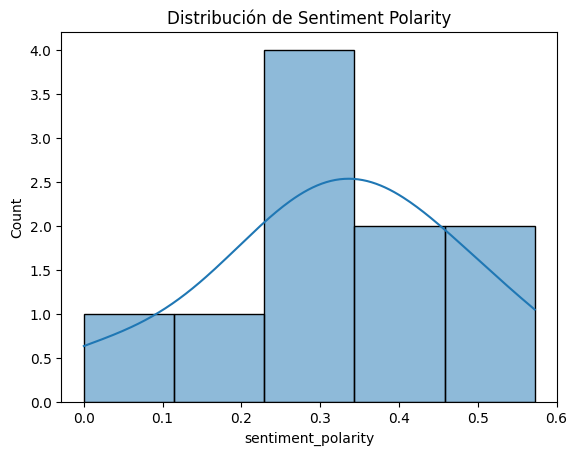

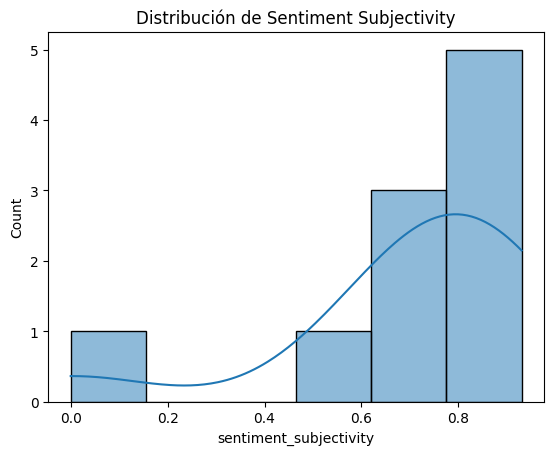

In [11]:
df.info()  # Información general del DataFrame

df.describe()  # Descripción estadística de las columnas numéricas

import matplotlib.pyplot as plt
import seaborn as sns
# Graficar la distribución de las puntuaciones de sentimiento
sns.histplot(df['sentiment_polarity'], kde=True)
plt.title("Distribución de Sentiment Polarity")
plt.show()

sns.histplot(df['sentiment_subjectivity'], kde=True)
plt.title("Distribución de Sentiment Subjectivity")
plt.show()

Paso 3: Visualización por canción

C:\Users\alan\AppData\Local\Temp\ipykernel_1824\1802923710.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment_polarity', y='song_name', data=df_sorted, palette="coolwarm")


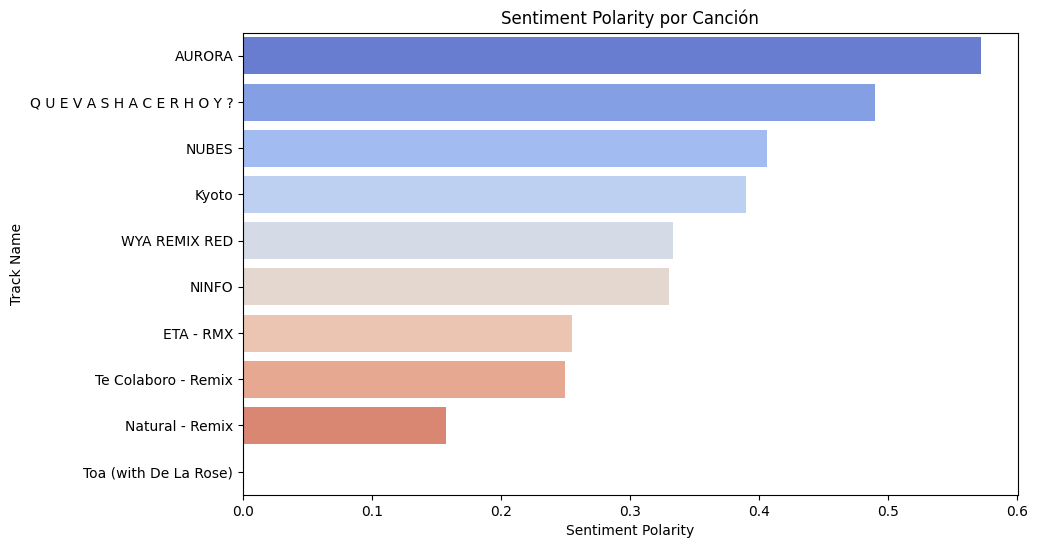

In [13]:
# Crear un gráfico de barras para las canciones y su sentimiento
plt.figure(figsize=(10, 6))
df_sorted = df.sort_values('sentiment_polarity', ascending=False)  # Ordenar por polaridad
sns.barplot(x='sentiment_polarity', y='song_name', data=df_sorted, palette="coolwarm")
plt.title("Sentiment Polarity por Canción")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Track Name")
plt.show()

Paso 4: Análisis de correlaciones

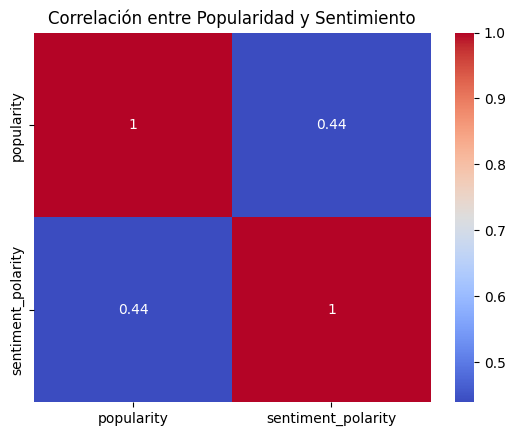

In [14]:
# Correlación entre popularidad y polaridad del sentimiento
correlation = df[['popularity', 'sentiment_polarity']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlación entre Popularidad y Sentimiento")
plt.show()